In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [3]:
pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Code to Modify a DataFrame slice
X = X.copy()

# Add x to y
X['G3'] = y['G3']



Correlation between final grade and study time: 0.249788689998863


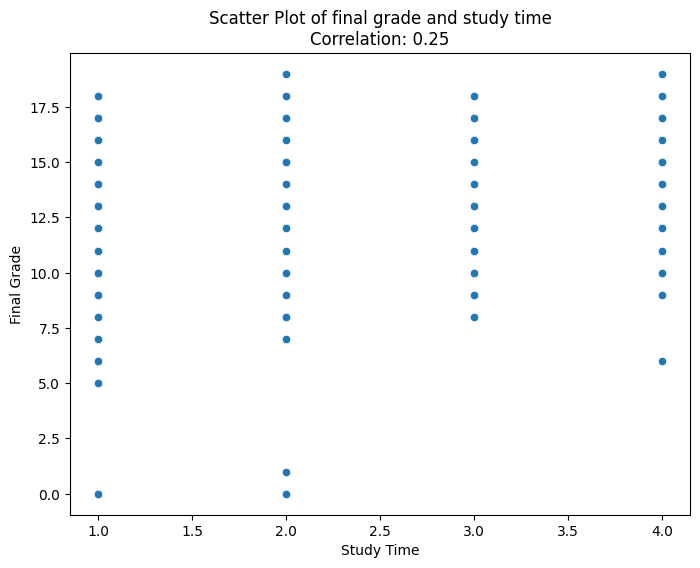

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Code for calculating correlation between final grade and study time
correlation = X[['G3', 'studytime']].corr().iloc[0, 1]
print("Correlation between final grade and study time:", correlation)

# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='studytime', y='G3')
plt.title(f'Scatter Plot of final grade and study time\nCorrelation: {correlation:.2f}')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()


Correlation between final grade and free time: -0.1227049258336979


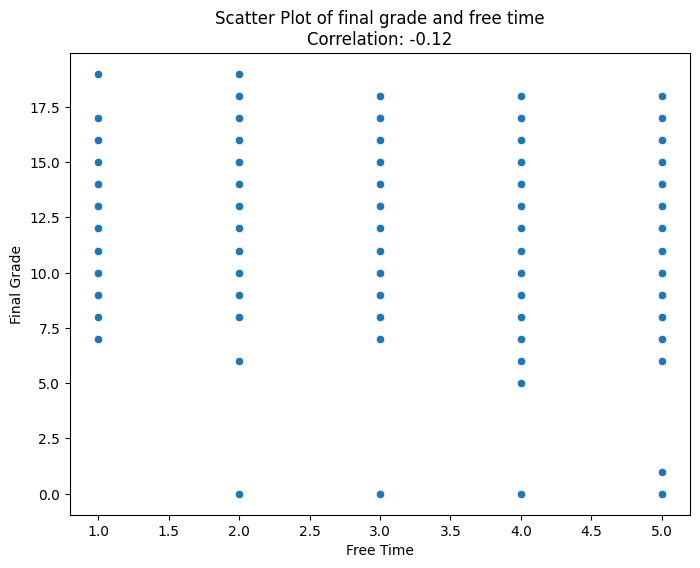

In [11]:
# Correlation between final grade and free time
correlation_freetime = X[['G3', 'freetime']].corr().iloc[0, 1]
print("Correlation between final grade and free time:", correlation_freetime)

# Make scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='freetime', y='G3')
plt.title(f'Scatter Plot of final grade and free time\nCorrelation: {correlation_freetime:.2f}')
plt.xlabel('Free Time')
plt.ylabel('Final Grade')
plt.show()


In [12]:
from scipy.stats import pearsonr

# p-value between final grade and study time
corr_study, p_study = pearsonr(X['studytime'], X['G3'])
print("Study Time vs Final Grade - Correlation:", corr_study, "P-value:", p_study)

# p-value between final grade and free time
corr_free, p_free = pearsonr(X['freetime'], X['G3'])
print("Free Time vs Final grade - Correlation:", corr_free, "P-value:", p_free)

Study Time vs Final Grade - Correlation: 0.2497886899988629 P-value: 1.0908085906064389e-10
Free Time vs Final grade - Correlation: -0.12270492583369745 P-value: 0.0017374839458200197


In [13]:
# Hypothesis for Study Time vs. Final Grade (and Free  Time)
# H0 = 0, H1 =/ 0 (both)-> Reject null bc both p-values are < 0.05. 
# Notes: There is a slight positive correlation between study time and final grades.
# Notes: There is an even slighter negative correlation between final grades and free time.
# Notes: Low correlation rates for both suggest there are other significant variables at play (ex: quality of study time, lazy but intuitive students)